# Data analysis: Survivors of sinking of the Titanic

Data analysis of survivors of sinking of the Titanic, using data from:

<https://hbiostat.org/data/>

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("ggplot")

In [3]:
pd.options.display.precision = 2

## Read data

In [4]:
df = pd.read_csv("titanic.txt")
df.head(5)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.00,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.00,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.00,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.00,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.92,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


## Analysis

### Number of passengers and survivors

In [5]:
def survivors(df):
    return len(df[df == 1])

def survivors_pct(df):
    if len(df) > 0:
        return len(df[df == 1]) / len(df)
    else:
        return 0.0

In [6]:
len(df)

1313

In [7]:
survivors(df["survived"])

449

In [8]:
survivors_pct(df["survived"])

0.341964965727342

### Survivors by gender

In [9]:
survivors_by_sex = df.groupby("sex")["survived"].agg(
    survivors_pct=survivors_pct,
    survivors=survivors,
    total=len
)
survivors_by_sex

,survivors_pct,survivors,total
sex,,,
female,0.66,307,463
male,0.17,142,850


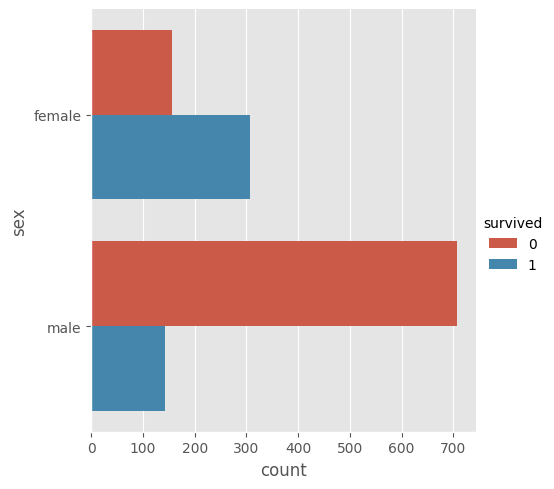

In [10]:
sns.catplot(data=df, y="sex", hue="survived", kind="count")

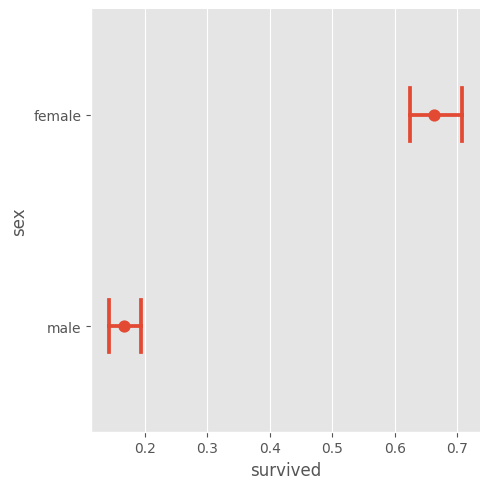

In [11]:
sns.catplot(data=df, y="sex", x="survived", kind="point", linestyle="none", orient="h", capsize=0.25)

### Survivors by passenger class

In [12]:
survivors_by_class = df.groupby("pclass")["survived"].agg(
    survivors_pct=survivors_pct,
    survivors=survivors,
    total=len
)
survivors_by_class

,survivors_pct,survivors,total
pclass,,,
1st,0.60,193,322
2nd,0.42,119,280
3rd,0.19,137,711


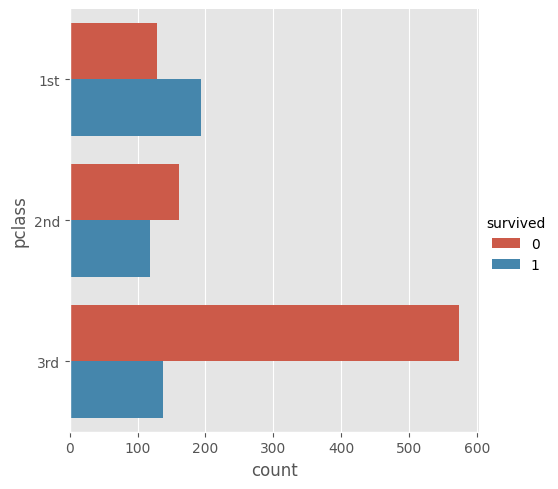

In [13]:
sns.catplot(data=df, y="pclass", hue="survived", kind="count")

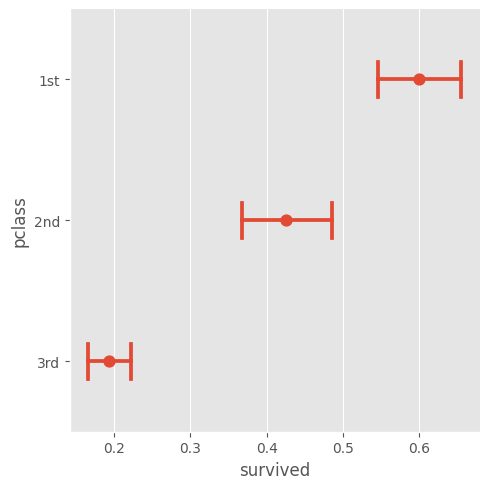

In [14]:
sns.catplot(data=df, y="pclass", x="survived", kind="point", linestyle="none", orient="h", capsize=0.25)

### Divide age into buckets

In [15]:
(df["age"].min(), df["age"].max())

(0.1667, 71.0)

In [16]:
bins = np.arange(0.0, 90.0, 10.0)
bins

array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.])

In [17]:
df["age_bucket"] = pd.cut(df["age"], bins=bins)
df.head(3)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex,age_bucket
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0,Southampton,"St Louis, MO",B-5,24160 L221,2,female,"(20.0, 30.0]"
1,2,1st,0,"Allison, Miss Helen Loraine",2.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,"(0.0, 10.0]"
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male,"(20.0, 30.0]"


### Survivors by age

In [18]:
survivors_by_age = df.groupby("age_bucket")["survived"].agg(
    survivors_pct=survivors_pct,
    survivors=survivors,
    total=len
)
survivors_by_age

/tmp/ipykernel_1223366/2302275579.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survivors_by_age = df.groupby("age_bucket")["survived"].agg(


,survivors_pct,survivors,total
age_bucket,,,
"(0.0, 10.0]",0.70,33,47
"(10.0, 20.0]",0.47,46,98
"(20.0, 30.0]",0.36,70,197
"(30.0, 40.0]",0.48,62,130
"(40.0, 50.0]",0.45,42,93
"(50.0, 60.0]",0.51,24,47
"(60.0, 70.0]",0.22,4,18
"(70.0, 80.0]",0.00,0,3


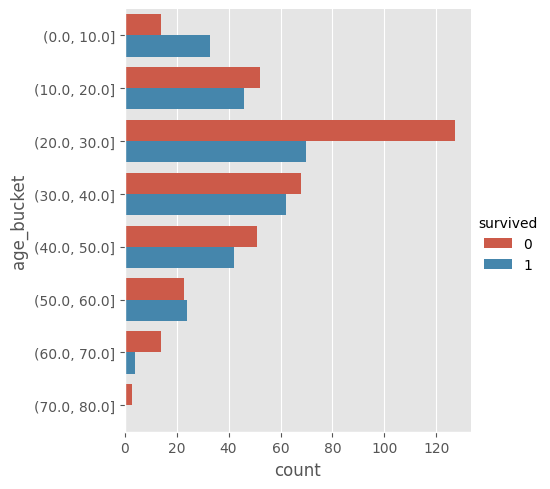

In [19]:
sns.catplot(data=df, y="age_bucket", hue="survived", kind="count")

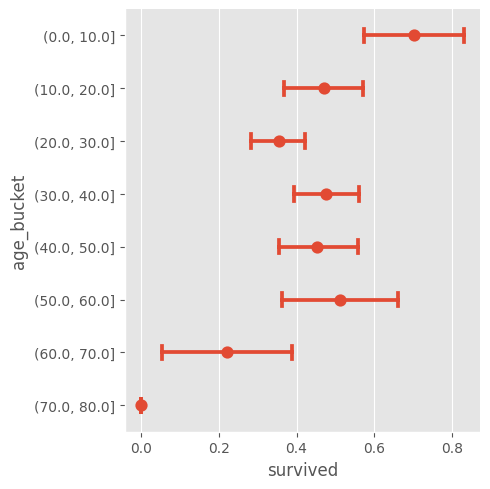

In [20]:
sns.catplot(data=df, y="age_bucket", x="survived", kind="point", linestyle="none", orient="h", capsize=0.25)

### Survivors by gender and passenger class

In [21]:
survivors_by_class_and_sex = df.groupby(["pclass", "sex"])["survived"].agg(
    survivors_pct=survivors_pct,
    survivors=survivors, 
    total=len
)
survivors_by_class_and_sex.unstack(level=0)

survivors_pct             survivors         total          
pclass           1st   2nd   3rd       1st 2nd 3rd   1st  2nd  3rd
sex                                                               
female          0.94  0.88  0.37       134  94  79   143  107  213
male            0.33  0.14  0.12        59  25  58   179  173  498

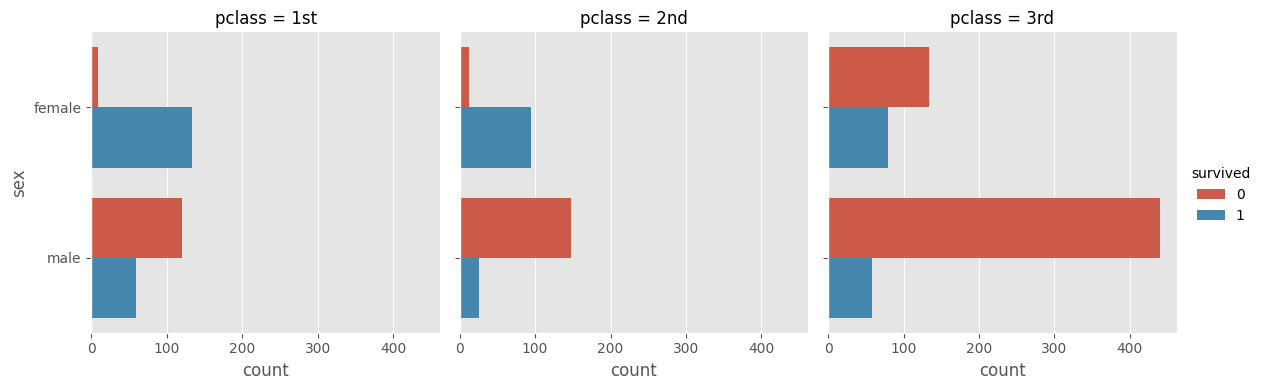

In [22]:
sns.catplot(data=df, y="sex", hue="survived", col="pclass", kind="count", height=4)

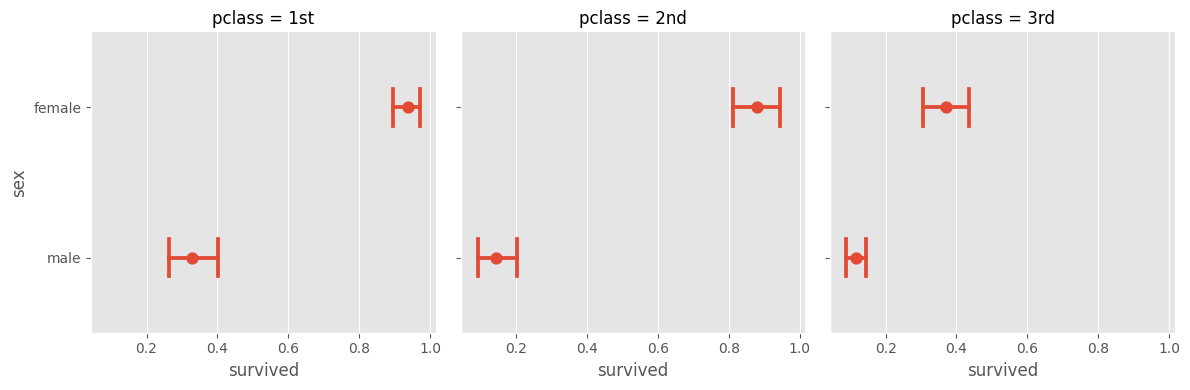

In [23]:
sns.catplot(data=df, y="sex", x="survived", col="pclass", kind="point", linestyle="none", orient="h", capsize=0.25, height=4)

### Survivors by age and passenger class

In [24]:
survivors_by_class_and_age = df.groupby(["pclass", "age_bucket"])["survived"].agg(
    survivors_pct=survivors_pct,
    survivors=survivors, 
    total=len
)
survivors_by_class_and_age.unstack(level=0)

/tmp/ipykernel_1223366/525529480.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survivors_by_class_and_age = df.groupby(["pclass", "age_bucket"])["survived"].agg(


survivors_pct             survivors             total            
pclass                 1st   2nd   3rd       1st   2nd   3rd   1st   2nd   3rd
age_bucket                                                                    
(0.0, 10.0]           0.75  1.00  0.43       3.0  20.0  10.0   4.0  20.0  23.0
(10.0, 20.0]          0.89  0.52  0.28      17.0  15.0  14.0  19.0  29.0  50.0
(20.0, 30.0]          0.67  0.33  0.18      30.0  28.0  12.0  45.0  84.0  68.0
(30.0, 40.0]          0.67  0.49  0.21      33.0  21.0   8.0  49.0  43.0  38.0
(40.0, 50.0]          0.54  0.44  0.14      29.0  11.0   2.0  54.0  25.0  14.0
(50.0, 60.0]          0.62  0.11  0.00      23.0   1.0   0.0  37.0   9.0   1.0
(60.0, 70.0]          0.25  0.00  0.00       4.0   0.0   0.0  16.0   1.0   1.0
(70.0, 80.0]          0.00  0.00   NaN       0.0   0.0   NaN   2.0   1.0   NaN

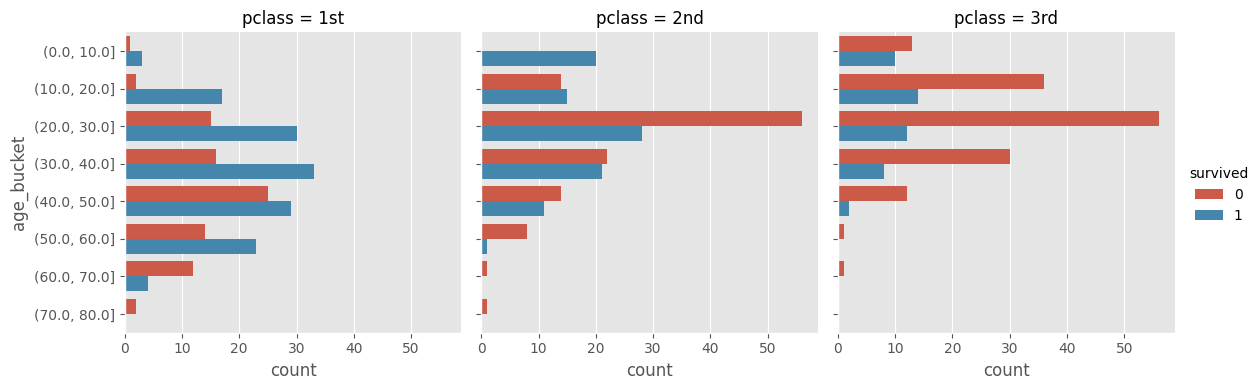

In [25]:
sns.catplot(data=df, y="age_bucket", hue="survived", col="pclass", kind="count", height=4)

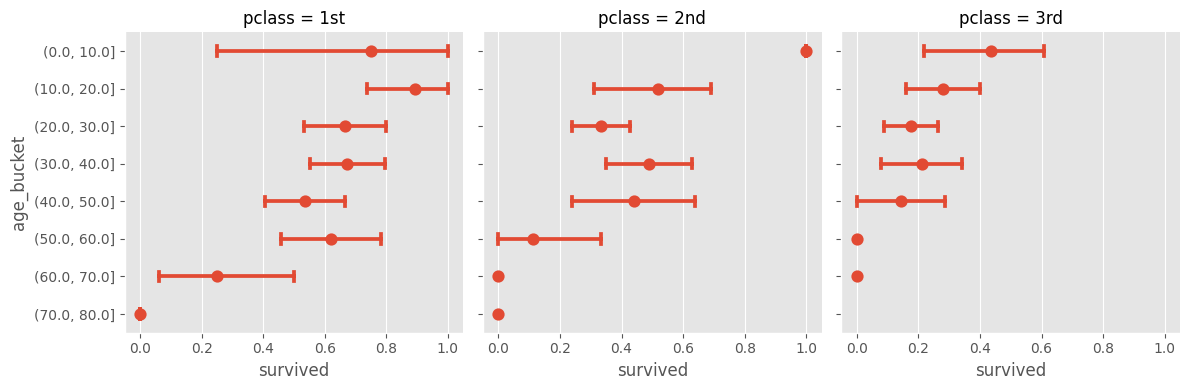

In [26]:
sns.catplot(data=df, y="age_bucket", x="survived", col="pclass", kind="point", linestyle="none", orient="h", capsize=0.25, height=4)